In [1]:
import matplotlib.pyplot as plt

In [2]:
EARTH_MOON_DIST_KM = 405_500  # Max distance center to center at apogee.

In [3]:
planet_diameter_km = {'Earth':    12_742, 
                      'Mercury':   4_880, 
                      'Venus':    12_104, 
                      'Mars':      6_780, 
                      'Jupiter': 139_822, 
                      'Saturn':  116_464, 
                      'Uranus':   50_724, 
                      'Neptune':  49_244, 
                      'Gap':           0, 
                      'Moon':      3_475}

# Distance occupied by packed planets from Earth center to moon center: 
packed_dist_km = (sum(planet_diameter_km.values()) 
                  - planet_diameter_km['Earth'] / 2 
                  - planet_diameter_km['Moon'] / 2)

gap = EARTH_MOON_DIST_KM - packed_dist_km    

# Insert 'gap' value into dictionary of diameters:
planet_diameter_km['Gap'] = gap

print(f'Gap at maximum separation = {gap: ,} km')

Gap at maximum separation =  17,373.5 km


In [4]:
# Scale the radii to Jupiter for plotting:
radius_scaled = ([(x / planet_diameter_km['Jupiter']) 
                  / 2 for x in planet_diameter_km.values()])

In [5]:
# Make a list of planet center points:
x_vals = [radius_scaled[0]]  # Start the list with Earth included.
for i in range(len(radius_scaled) - 1):
    x = x_vals[i] + radius_scaled[i] + radius_scaled[i + 1]  
    x_vals.append(x)

x_vals

[0.045565075596115064,
 0.10858091001416087,
 0.16931527227474932,
 0.2368439873553518,
 0.7610890989972965,
 1.6775614710131452,
 2.2754216074723574,
 2.632904693109811,
 2.8711272188925916,
 2.9456809371915713]

In [6]:
# Assign colors to the planets. The gap gets 'None'.
colors = {'Earth':   'deepskyblue', 
          'Mercury': 'gray', 
          'Venus':   'gold', 
          'Mars':    'red', 
          'Jupiter': 'orange', 
          'Saturn':  'yellow', 
          'Uranus':  'turquoise', 
          'Neptune': 'skyblue', 
          '':        'None',
          'Moon':    'gray'}

# Extract the planet names & colors as lists:
names = list(colors)
colors = list(colors.values()) 

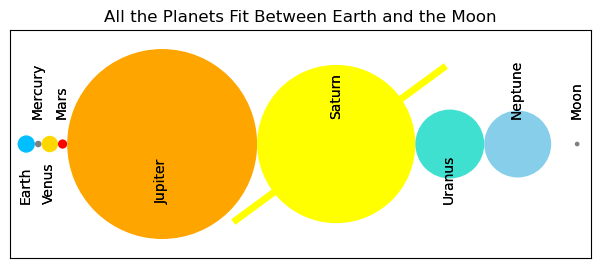

In [7]:
# Set up the figure:
figure, ax = plt.subplots(figsize=(7.5, 4.5))
ax.set_title("All the Planets Fit Between Earth and the Moon")
ax.set_aspect(1)
ax.set_xlim(-0.04, 3.02)
ax.set_ylim(-0.6, 0.6)
ax.set_xticks([])  # Blanks out axis ticks.
ax.set_yticks([])  # Blanks out axis ticks.

for i, j in enumerate(x_vals):
    circle = plt.Circle((j, 0), 
                        radius_scaled[i], 
                        facecolor=colors[i], 
                        edgecolor='None')
    if i % 2 == 0:
        text = plt.text(j -0.04, -0.3, 
                        names[i], 
                        fontsize=10, 
                        rotation=90)
    else:
        text = plt.text(j -0.04, 0.15, 
                        names[i], 
                        fontsize=10, 
                        rotation=90)
    ax.add_artist(circle)
    ax.add_artist(text)

# Draw a tilted yellow line for the rings of Saturn:
ax.plot([1.15, 2.24], [-0.4, 0.4], 
        color='yellow', lw=5);